# Exploring Dandiset 001335: Neuropixels Recordings from Hippocampus during Odor Presentation

**Note:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results and validate them independently.

## Introduction

This notebook explores the Dandiset 001335: "Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation." The dataset contains neural recordings from the hippocampus of head-fixed wild type mice as they were presented with various odor sequences. The recordings were performed using Neuropixels probes, which provide high-density electrical recordings of neural activity.

The neural data in this dataset includes:
- Local Field Potential (LFP) data from multiple electrode channels
- Spiking activity of individual neurons (units)
- Temporal markers for different odor presentations

This notebook will guide you through the process of accessing, exploring, and visualizing this data, focusing on:
1. Basic metadata and structure of the dataset
2. Electrode configurations and spatial arrangement
3. LFP activity patterns and their relationship to odor presentation
4. Spiking activity of individual neurons during odor stimuli

Let's begin by examining the basic structure of the Dandiset.

## Required Packages

Before running this notebook, make sure you have the following packages installed:

- pynwb
- h5py
- remfile
- numpy
- matplotlib
- pandas
- seaborn
- scipy

Let's start by importing these packages and setting up our environment.

In [1]:
# Import necessary libraries
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import signal

# Set matplotlib style for better visualization
sns.set_theme()

## Accessing the Dandiset

We'll begin by using the DANDI API to list the available assets in the Dandiset.

In [2]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

# Display basic information about the Dandiset
print(f"Dandiset ID: {dandiset.identifier}")
print(f"Version: {dandiset.version}")

# Get metadata directly using the API client
metadata = client.get_dandiset("001335").get_raw_metadata()
print(f"Name: {metadata['name']}")
print(f"Description: {metadata['description']}")
print(f"Number of assets: {len(assets)}")

Dandiset ID: 001335
Version: draft
Name: Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation
Description: Head-fixed wild type mice were presented with various odor sequences, as neural activity was recorded from hippocampus using Neuropixels probes.
Number of assets: 1


### Listing Available Assets

Let's examine the assets contained in this Dandiset.

In [3]:
# Display information about each asset
for i, asset in enumerate(assets):
    print(f"Asset {i+1}:")
    print(f"  ID: {asset.identifier}")
    print(f"  Path: {asset.path}")
    print(f"  Size: {asset.size / (1024*1024):.2f} MB")

Asset 1:
  ID: aca66db7-4c02-4453-8dcb-a179d44b1c5d
  Path: sub-M541/sub-M541_ecephys.nwb
  Size: 1310.60 MB


## Loading the NWB File

This Dandiset contains neurophysiology data stored in the Neurodata Without Borders (NWB) format. Let's load the NWB file and explore its structure.

In [4]:
# Function to load NWB file
def load_nwb_file(asset_id):
    """Load an NWB file from the DANDI archive using its asset ID"""
    url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
    file = remfile.File(url)
    f = h5py.File(file)
    io = pynwb.NWBHDF5IO(file=f)
    nwb = io.read()
    return nwb, f

# Load the first (and only) NWB file in this dataset
asset_id = assets[0].identifier
nwb, f_handle = load_nwb_file(asset_id)

## Basic Metadata

Let's examine the basic metadata of this session.

In [5]:
# Display basic session metadata
print(f"Session ID: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Experiment Description: {nwb.experiment_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

# Display subject information
print("\nSubject Information:")
print(f"  Subject ID: {nwb.subject.subject_id}")
print(f"  Species: {nwb.subject.species}")
print(f"  Sex: {nwb.subject.sex}")
print(f"  Age: {nwb.subject.age}")
print(f"  Description: {nwb.subject.description}")

Session ID: M541-2024-08-31
Session Description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Experiment Description: Head-fixed mouse presented with odor sequences
Session Start Time: 2025-02-14 10:53:25.647928-05:00
Lab: vandermeerlab
Institution: Dartmouth College

Subject Information:
  Subject ID: M541
  Species: Mus musculus
  Sex: M
  Age: P8W/
  Description: Headbarr-ed mouse with craniotomies over dCA1


The session description indicates that the experiment is divided into different blocks with different odor sequences:
- Block 1: UE (Odors A, B, C)
- Block 2: SE (Odors D, E, F)
- Block 3: Localizer

The subject is a male mouse (M541) with craniotomies over dorsal CA1 hippocampus.

## Dataset Keywords

Let's check the keywords associated with this dataset to understand its content.

In [6]:
# Display keywords
keywords = nwb.keywords[:]
print("Dataset Keywords:")
for keyword in keywords:
    print(f"- {keyword}")

Dataset Keywords:
- ecephys
- neuropixels
- odor-sequences
- hippocampus


## Exploring Experimental Blocks and Odor Presentations

This experiment contains different blocks of odor presentations. Let's explore the intervals for these blocks and the odor presentations.

In [7]:
# Explore interval information
print("Available interval groups:")
for interval_name in nwb.intervals:
    print(f"- {interval_name}")

Available interval groups:
- Block 1
- Block 2
- Block 3
- Odor A ON
- Odor B ON
- Odor C ON
- Odor D ON
- Odor E ON
- Odor F ON


Let's look at the timing of the experimental blocks:

In [8]:
# Extract block intervals
blocks = {}
for interval_name, interval in nwb.intervals.items():
    if "Block" in interval_name:
        blocks[interval_name] = []
        for i in range(len(interval.id)):
            blocks[interval_name].append((interval.start_time[i], interval.stop_time[i]))

# Display block timing information
print("Experimental Blocks:")
for block_name, intervals in blocks.items():
    for start_time, stop_time in intervals:
        print(f"{block_name}: {start_time:.2f}s to {stop_time:.2f}s (Duration: {stop_time - start_time:.2f}s)")

Experimental Blocks:
Block 1: 616.00s to 2144.00s (Duration: 1528.00s)
Block 2: 2712.00s to 4243.00s (Duration: 1531.00s)
Block 3: 4859.00s to 6182.00s (Duration: 1323.00s)


Now, let's analyze the odor presentation intervals:

In [9]:
# Extract odor presentation intervals
odor_intervals = {}
for interval_name, interval in nwb.intervals.items():
    if "Odor" in interval_name and "ON" in interval_name:
        odor_name = interval_name.split(" ")[1]  # Extract just the odor letter
        odor_intervals[odor_name] = []
        for i in range(len(interval.id)):
            odor_intervals[odor_name].append((interval.start_time[i], interval.stop_time[i]))

# Count presentations and calculate durations
print("Odor Presentation Statistics:")
for odor_name, intervals in odor_intervals.items():
    if intervals:
        # Calculate statistics
        n_presentations = len(intervals)
        total_duration = sum(stop - start for start, stop in intervals)
        mean_duration = total_duration / n_presentations
        
        # Get first and last presentation time
        first_start = intervals[0][0]
        last_stop = intervals[-1][1]
        
        print(f"Odor {odor_name}:")
        print(f"  Number of presentations: {n_presentations}")
        print(f"  Mean presentation duration: {mean_duration:.2f}s")
        print(f"  Range: {first_start:.2f}s to {last_stop:.2f}s")
        print(f"  Total presentation time: {total_duration:.2f}s")

Odor Presentation Statistics:
Odor A:
  Number of presentations: 101
  Mean presentation duration: 2.00s
  Range: 645.08s to 6168.19s
  Total presentation time: 202.12s
Odor B:
  Number of presentations: 101
  Mean presentation duration: 2.00s
  Range: 627.42s to 6114.42s
  Total presentation time: 202.00s
Odor C:
  Number of presentations: 101
  Mean presentation duration: 2.00s
  Range: 621.84s to 6147.06s
  Total presentation time: 202.12s
Odor D:
  Number of presentations: 101
  Mean presentation duration: 2.00s
  Range: 2717.42s to 6102.93s
  Total presentation time: 202.00s
Odor E:
  Number of presentations: 101
  Mean presentation duration: 2.00s
  Range: 2724.06s to 6158.08s
  Total presentation time: 202.12s
Odor F:
  Number of presentations: 101
  Mean presentation duration: 2.00s
  Range: 2729.77s to 6003.61s
  Total presentation time: 202.00s


## Visualizing Experimental Timeline

Let's create a visual representation of the experimental timeline, including the blocks and odor presentations.

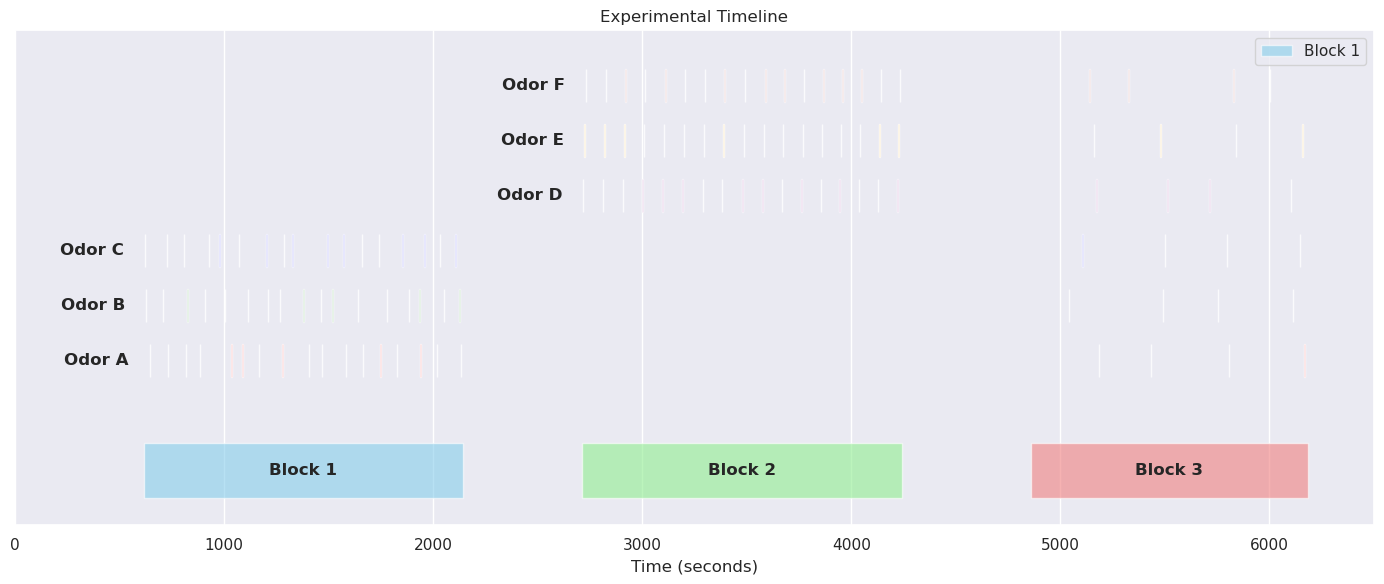

In [10]:
# Create a timeline visualization
plt.figure(figsize=(14, 6))

# Plot blocks
colors = ['skyblue', 'lightgreen', 'lightcoral']
block_names = sorted(blocks.keys())
for i, block_name in enumerate(block_names):
    for start, end in blocks[block_name]:
        plt.barh(0, end - start, left=start, height=0.5, color=colors[i % len(colors)], alpha=0.6, label=block_name if i == 0 else "")
        plt.text((start + end) / 2, 0, block_name, va='center', ha='center', fontweight='bold')

# Plot odor presentations
odor_heights = {}
odor_colors = {
    'A': 'red', 'B': 'green', 'C': 'blue',
    'D': 'purple', 'E': 'orange', 'F': 'brown'
}
y_pos = 1

for odor_name, intervals in odor_intervals.items():
    if intervals:
        # Plot only a subset of presentations for clarity
        sample_intervals = intervals[::5]  # Every 5th presentation
        
        odor_heights[odor_name] = y_pos
        for start, end in sample_intervals:
            plt.barh(y_pos, end - start, left=start, height=0.3, 
                    color=odor_colors.get(odor_name, 'gray'), alpha=0.8)
        
        # Label the first one
        start, end = sample_intervals[0]
        plt.text(start - 100, y_pos, f"Odor {odor_name}", va='center', ha='right', fontweight='bold')
        
        y_pos += 0.5

# Set plot limits and labels
plt.xlim(0, 6500)  # Adjust based on total session duration
plt.ylim(-0.5, y_pos)
plt.xlabel('Time (seconds)')
plt.yticks([])  # Hide y-axis ticks
plt.title('Experimental Timeline')

# Add legend for blocks
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

This timeline visualization helps us understand the structure of the experiment:

- The experiment consists of three main blocks of odor presentations
- Each odor is presented multiple times (approximately 100 presentations per odor)
- Each odor presentation lasts approximately 2 seconds
- Odors A, B, and C are presented in Block 1, while Odors D, E, and F are presented in Block 2

Now, let's explore the neural data recorded during these odor presentations.

## Exploring Electrode Configuration

The neural activity was recorded using Neuropixels probes, which contain multiple recording sites (electrodes) arranged in a linear fashion. Let's examine the electrode configuration used in this experiment.

In [11]:
# Check electrode groups
print("Electrode Groups:")
for group_name, group in nwb.electrode_groups.items():
    print(f"Group: {group_name}")
    print(f"  Description: {group.description}")
    print(f"  Location: {group.location}")
    print(f"  Device: {group.device.description} (Manufacturer: {group.device.manufacturer})")

Electrode Groups:
Group: imec0.shank0
  Description: electrode group for shank 0 on imec0
  Location: brain area
  Device: 4-shank NPX2.0  (Manufacturer: IMEC)
Group: imec0.shank1
  Description: electrode group for shank 1 on imec0
  Location: brain area
  Device: 4-shank NPX2.0  (Manufacturer: IMEC)
Group: imec0.shank2
  Description: electrode group for shank 2 on imec0
  Location: brain area
  Device: 4-shank NPX2.0  (Manufacturer: IMEC)
Group: imec0.shank3
  Description: electrode group for shank 3 on imec0
  Location: brain area
  Device: 4-shank NPX2.0  (Manufacturer: IMEC)
Group: imec1.shank0
  Description: electrode group for shank 0 on imec1
  Location: brain area
  Device: 4-shank NPX2.0  (Manufacturer: IMEC)
Group: imec1.shank1
  Description: electrode group for shank 1 on imec1
  Location: brain area
  Device: 4-shank NPX2.0  (Manufacturer: IMEC)
Group: imec1.shank2
  Description: electrode group for shank 2 on imec1
  Location: brain area
  Device: 4-shank NPX2.0  (Manufact

Now, let's extract the electrode information into a DataFrame for easier analysis:

In [12]:
# Extract electrode information
electrode_data = {
    'id': [],
    'location': [],
    'group_name': [], 
    'depth': [],
    'hemisphere': []
}

# Collect electrode data
for i in range(len(nwb.electrodes.id)):
    electrode_data['id'].append(i)
    electrode_data['location'].append(nwb.electrodes['location'][i])
    electrode_data['group_name'].append(nwb.electrodes['group_name'][i])
    electrode_data['depth'].append(nwb.electrodes['depth'][i])
    electrode_data['hemisphere'].append(nwb.electrodes['hemisphere'][i])

electrodes_df = pd.DataFrame(electrode_data)

print(f"Total number of electrodes: {len(electrodes_df)}")
print("\nSample of electrode data:")
print(electrodes_df.head())

# Count electrodes by group
print("\nNumber of electrodes per group:")
print(electrodes_df['group_name'].value_counts().sort_index())

# Count electrodes by hemisphere
print("\nNumber of electrodes per hemisphere:")
print(electrodes_df['hemisphere'].value_counts())

Total number of electrodes: 64

Sample of electrode data:
   id    location    group_name   depth hemisphere
0   0  brain area  imec0.shank0  2390.0      Right
1   1  brain area  imec0.shank0  2285.0      Right
2   2  brain area  imec0.shank0  2195.0      Right
3   3  brain area  imec0.shank0  2090.0      Right
4   4  brain area  imec0.shank0  1985.0      Right

Number of electrodes per group:
group_name
imec0.shank0    8
imec0.shank1    8
imec0.shank2    8
imec0.shank3    8
imec1.shank0    8
imec1.shank1    8
imec1.shank2    8
imec1.shank3    8
Name: count, dtype: int64

Number of electrodes per hemisphere:
hemisphere
Right    32
Left     32
Name: count, dtype: int64


Let's visualize the electrode depths by group to understand the spatial arrangement:

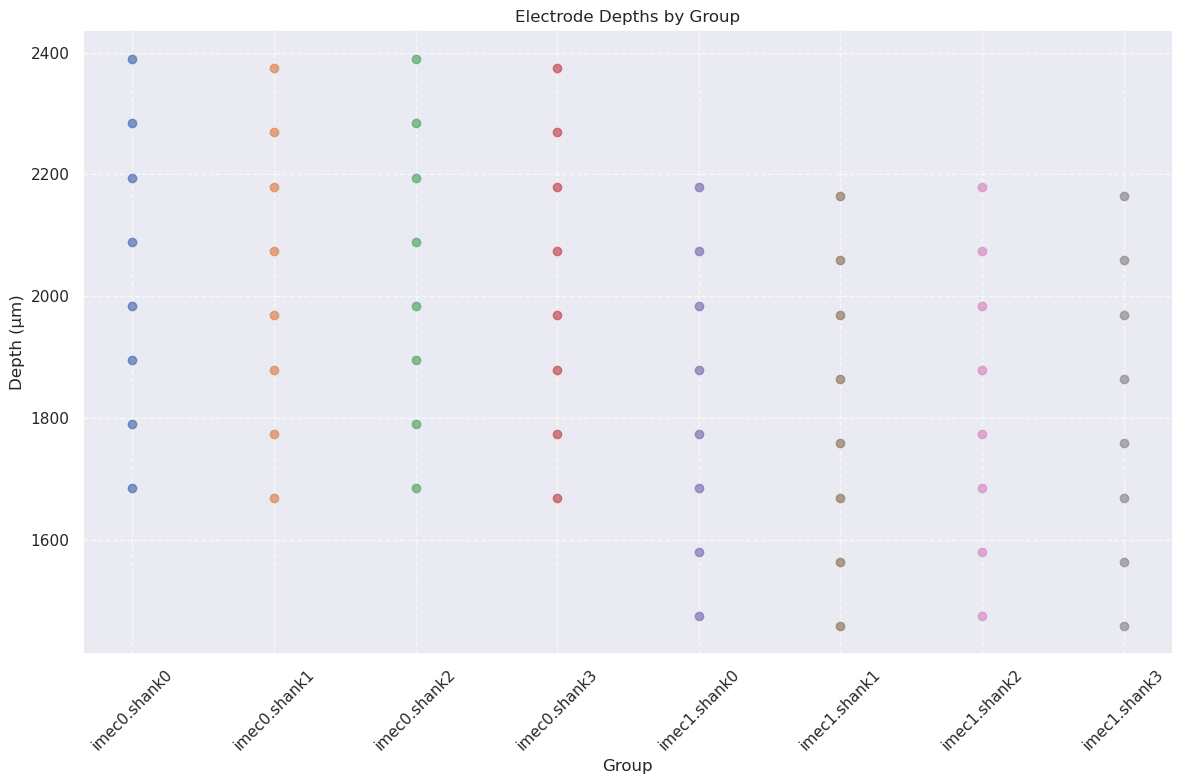

In [13]:
# Visualize electrode depth distribution by group
plt.figure(figsize=(12, 8))
groups = sorted(electrodes_df['group_name'].unique())

# Create a plot of electrode depths by group
for i, group in enumerate(groups):
    group_data = electrodes_df[electrodes_df['group_name'] == group]
    x_positions = np.ones(len(group_data)) * i
    plt.scatter(x_positions, group_data['depth'], alpha=0.7, 
                label=f"{group} (n={len(group_data)})")

plt.title('Electrode Depths by Group')
plt.xlabel('Group')
plt.xticks(range(len(groups)), groups, rotation=45)
plt.ylabel('Depth (μm)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can also visualize the electrode placement separately for each probe:

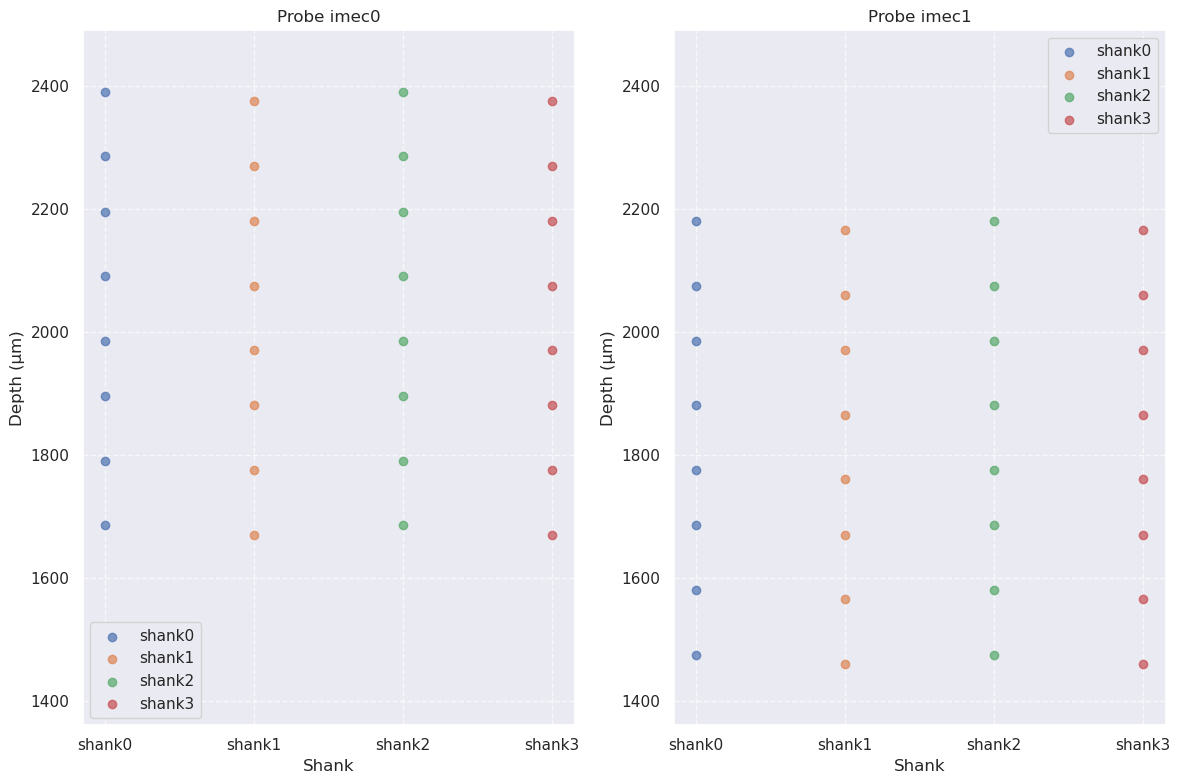

In [14]:
# Visualize electrode placement
plt.figure(figsize=(12, 8))

# Get probe names
probes = sorted(list(set([group_name.split('.')[0] for group_name in groups])))

for p_idx, probe in enumerate(probes):
    plt.subplot(1, len(probes), p_idx + 1)
    
    # Filter for this probe
    probe_mask = electrodes_df['group_name'].str.contains(probe)
    probe_df = electrodes_df[probe_mask]
    
    # Get shanks for this probe
    shanks = sorted(list(set([group_name.split('.')[1] for group_name in probe_df['group_name']])))
    
    # Plot electrodes by shank
    for s_idx, shank in enumerate(shanks):
        shank_mask = probe_df['group_name'].str.contains(f"{probe}.{shank}")
        shank_df = probe_df[shank_mask]
        
        # Calculate x-position for this shank (evenly space shanks horizontally)
        x_pos = s_idx
        
        # Plot points for this shank
        plt.scatter(x_pos * np.ones(len(shank_df)), shank_df['depth'], 
                   alpha=0.7, label=f"shank{shank[-1]}")
    
    plt.title(f"Probe {probe}")
    plt.xlabel("Shank")
    plt.xticks(range(len(shanks)), [f"shank{shank[-1]}" for shank in shanks])
    plt.ylabel("Depth (μm)")
    plt.ylim([electrodes_df['depth'].min() - 100, electrodes_df['depth'].max() + 100])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

plt.tight_layout()
plt.show()

Let's also look at the electrode distribution across hemispheres:

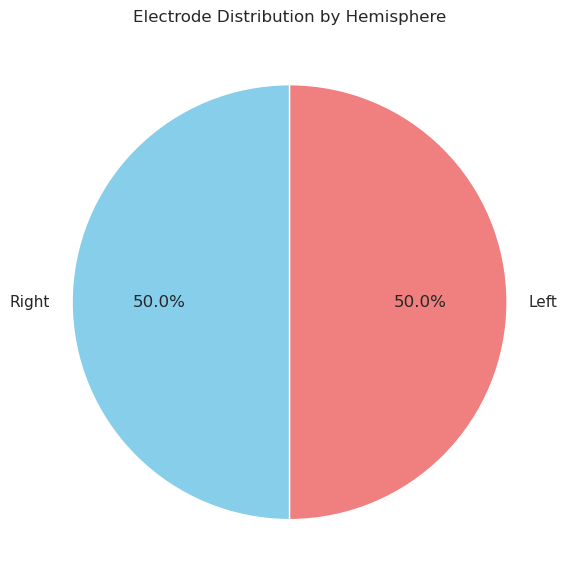

In [15]:
# Visualize the distribution of electrodes across hemispheres
plt.figure(figsize=(8, 6))
hemisphere_counts = electrodes_df['hemisphere'].value_counts()
electrode_counts = hemisphere_counts.values
labels = hemisphere_counts.index

plt.pie(electrode_counts, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['skyblue', 'lightcoral'])
plt.title('Electrode Distribution by Hemisphere')
plt.tight_layout()
plt.show()

## Exploring LFP Data

Local Field Potential (LFP) represents the combined electrical activity of neurons in the vicinity of the recording electrode. Let's explore the LFP data in this dataset.

In [16]:
# Access LFP data
lfp = nwb.processing["ecephys"].data_interfaces["LFP"]
print(f"LFP data shape: {lfp.data.shape} (samples × channels)")
print(f"Sampling rate: {lfp.rate} Hz")
print(f"Total duration: {lfp.data.shape[0] / lfp.rate:.2f} seconds ({lfp.data.shape[0] / lfp.rate / 60:.2f} minutes)")
print(f"LFP Description: {lfp.description}")
print(f"Unit: {lfp.unit}")

LFP data shape: (15475276, 64) (samples × channels)
Sampling rate: 2500.0 Hz
Total duration: 6190.11 seconds (103.17 minutes)
LFP Description: Raw data subsampled  2500 Hz and bandpass filtered in the range 1-400 Hz
Unit: volts


### Visualizing LFP Traces during Odor Presentation

Let's visualize the LFP activity around an odor presentation to see how neural activity changes in response to sensory stimuli.

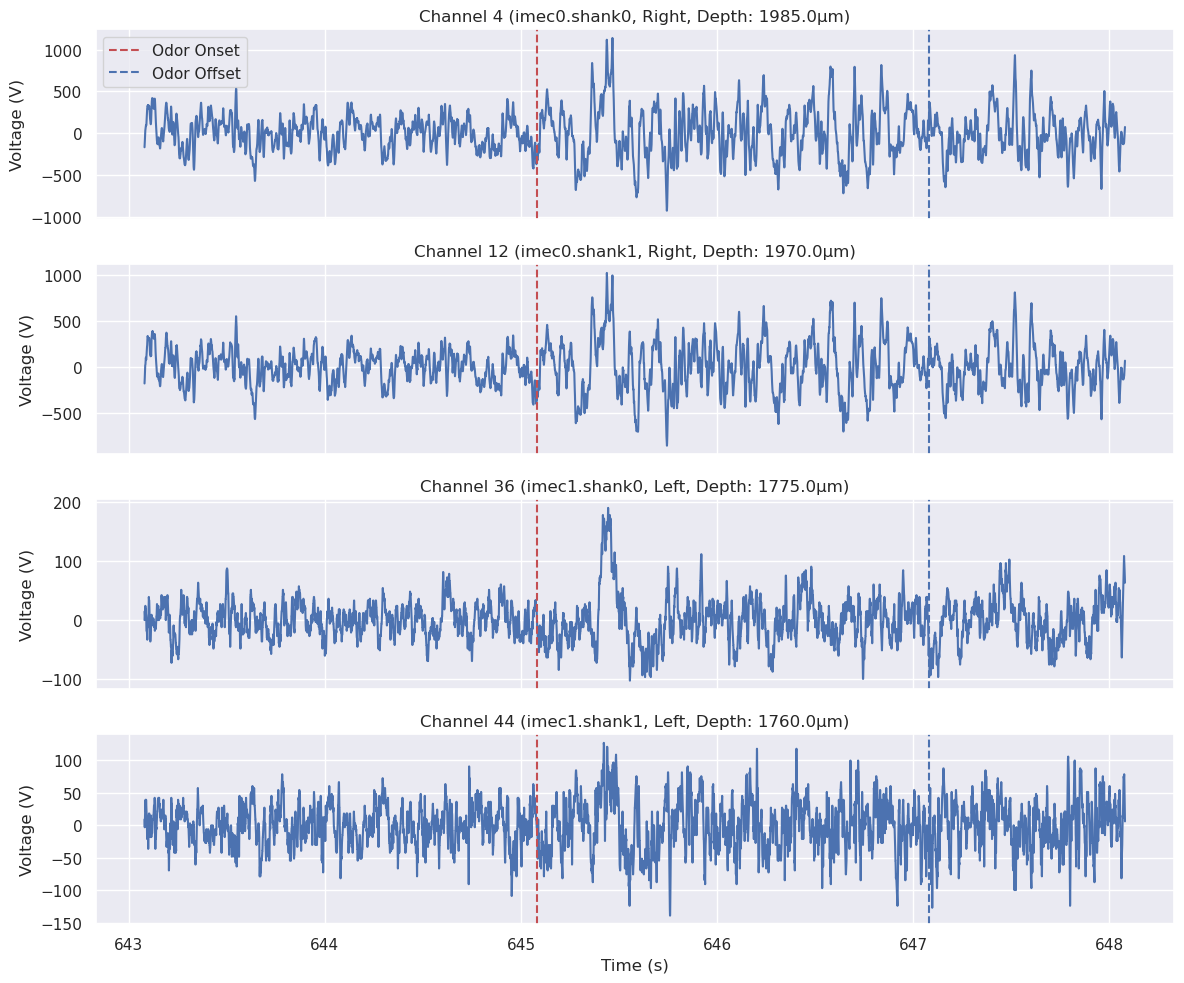

In [17]:
# Function to extract a segment of LFP data around an event
def extract_lfp_segment(lfp, event_time, before=2, after=3):
    """Extract a segment of LFP data around an event
    
    Parameters:
    -----------
    lfp : ElectricalSeries object
        The LFP data
    event_time : float
        The time of the event (in seconds)
    before : float
        Amount of time to include before the event (in seconds)
    after : float
        Amount of time to include after the event (in seconds)
        
    Returns:
    --------
    segment : numpy.ndarray
        Array of shape (time_points, channels)
    time_vector : numpy.ndarray
        Array of time points (in seconds)
    """
    # Calculate indices
    start_time = event_time - before
    end_time = event_time + after
    
    # Convert to samples
    start_idx = max(0, int(start_time * lfp.rate))
    end_idx = min(lfp.data.shape[0], int(end_time * lfp.rate))
    
    # Extract data
    segment = lfp.data[start_idx:end_idx, :]
    
    # Create time vector
    time_vector = np.arange(start_idx, end_idx) / lfp.rate
    
    return segment, time_vector

# Get the first presentation of Odor A
if 'A' in odor_intervals and len(odor_intervals['A']) > 0:
    start_time, stop_time = odor_intervals['A'][0]
    
    # Extract data segment around odor presentation
    lfp_segment, time_vector = extract_lfp_segment(lfp, start_time)
    
    # Plot LFP traces for a few channels from different shanks
    fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
    
    # Select channels from different electrode groups (one from each probe/shank combination)
    selected_channels = []
    for probe in ['imec0', 'imec1']:
        for shank in range(2):  # Just take shank 0 and 1 from each probe
            mask = electrodes_df['group_name'] == f"{probe}.shank{shank}"
            if any(mask):
                # Take the middle electrode in the shank
                channel_idx = electrodes_df[mask].index[len(electrodes_df[mask]) // 2]
                selected_channels.append(int(electrodes_df.loc[channel_idx, 'id']))
    
    if len(selected_channels) < 4:  # If we couldn't get 4 channels, just take the first 4
        selected_channels = list(range(min(4, lfp_segment.shape[1])))
    
    # Plot each channel
    for i, channel in enumerate(selected_channels[:4]):
        group_name = electrodes_df.loc[electrodes_df['id'] == channel, 'group_name'].values[0]
        hemisphere = electrodes_df.loc[electrodes_df['id'] == channel, 'hemisphere'].values[0]
        depth = electrodes_df.loc[electrodes_df['id'] == channel, 'depth'].values[0]
        
        # Plot the LFP trace
        axes[i].plot(time_vector, lfp_segment[:, channel])
        axes[i].set_ylabel("Voltage (V)")
        axes[i].set_title(f"Channel {channel} ({group_name}, {hemisphere}, Depth: {depth}μm)")
        
        # Add vertical line at odor onset
        axes[i].axvline(x=start_time, color='r', linestyle='--', label="Odor Onset")
        
        # Add vertical line at odor offset
        axes[i].axvline(x=stop_time, color='b', linestyle='--', label="Odor Offset")
        
        # Only add legend to the first plot to avoid clutter
        if i == 0:
            axes[i].legend()
    
    # Set common xlabel
    axes[-1].set_xlabel("Time (s)")
    plt.tight_layout()
    plt.show()
else:
    print("Could not find Odor A intervals")

### LFP Heatmap Across Channels

Let's visualize the LFP activity across multiple channels using a heatmap:

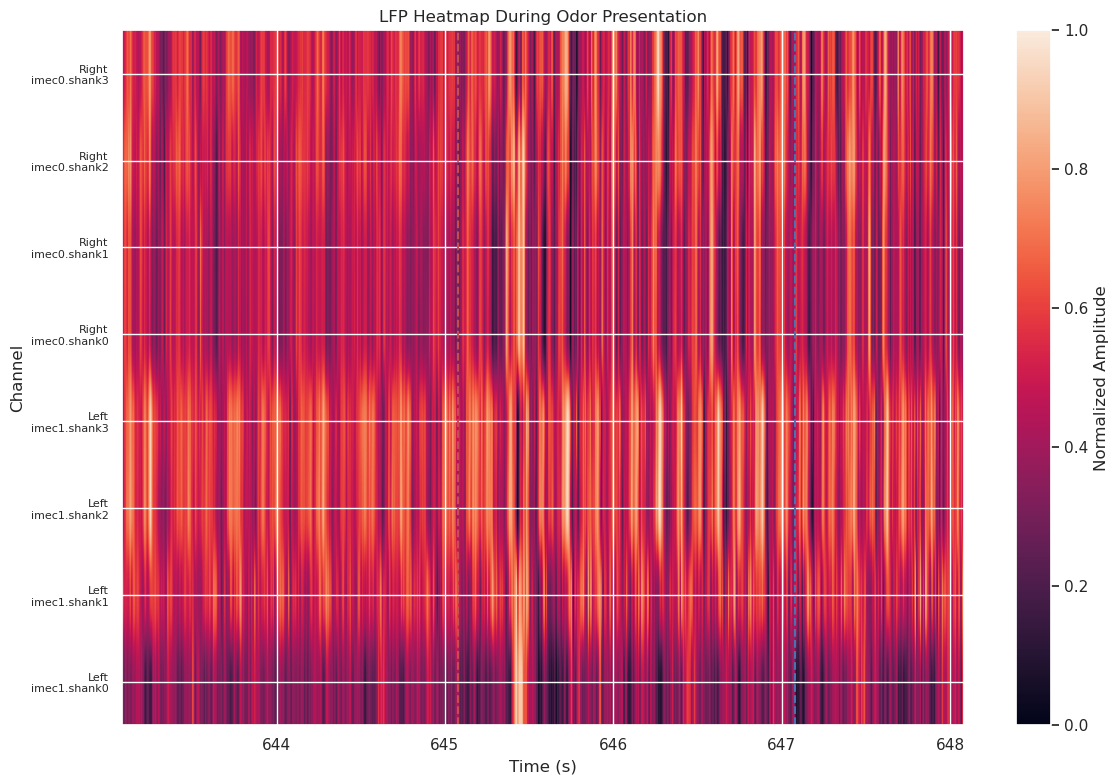

In [18]:
# Create a heatmap of LFP activity across channels
if 'A' in odor_intervals and len(odor_intervals['A']) > 0:
    start_time, stop_time = odor_intervals['A'][0]
    
    # Extract data segment around odor presentation
    lfp_segment, time_vector = extract_lfp_segment(lfp, start_time)
    
    # Take a subset of channels spanning different shanks
    selected_channels = []
    for probe in ['imec0', 'imec1']:
        for shank in range(4):  # Take all 4 shanks
            mask = electrodes_df['group_name'] == f"{probe}.shank{shank}"
            if any(mask):
                # Take the middle electrode in the shank
                channel_idx = electrodes_df[mask].index[len(electrodes_df[mask]) // 2]
                selected_channels.append(int(electrodes_df.loc[channel_idx, 'id']))
                
    # Organize the channels by probe, shank, and hemisphere
    selected_channels_df = electrodes_df[electrodes_df['id'].isin(selected_channels)].copy()
    selected_channels_df['probe'] = selected_channels_df['group_name'].apply(lambda x: x.split('.')[0])
    selected_channels_df['shank'] = selected_channels_df['group_name'].apply(lambda x: int(x.split('.')[-1][-1]))
    
    # Sort by hemisphere, then probe, then shank
    selected_channels_df = selected_channels_df.sort_values(['hemisphere', 'probe', 'shank']).reset_index(drop=True)
    selected_channels = selected_channels_df['id'].tolist()
    
    # Create a subset of the LFP data with just the selected channels
    lfp_subset = lfp_segment[:, selected_channels]
    
    # Normalize each channel to its min and max for better visualization
    normalized_lfp = np.zeros_like(lfp_subset)
    for i in range(lfp_subset.shape[1]):
        channel_data = lfp_subset[:, i]
        channel_min = np.min(channel_data)
        channel_max = np.max(channel_data)
        normalized_lfp[:, i] = (channel_data - channel_min) / (channel_max - channel_min)
        
    plt.figure(figsize=(12, 8))
    
    # Create the heatmap
    plt.imshow(normalized_lfp.T, aspect='auto', origin='lower', 
               extent=[time_vector[0], time_vector[-1], 0, lfp_subset.shape[1]])
    
    # Add colorbar
    plt.colorbar(label='Normalized Amplitude')
    
    # Add vertical lines for odor onset and offset
    plt.axvline(x=start_time, color='r', linestyle='--', label="Odor Onset")
    plt.axvline(x=stop_time, color='b', linestyle='--', label="Odor Offset")
    
    # Create custom y-tick labels with electrode info
    y_tick_labels = []
    for i, channel_id in enumerate(selected_channels):
        channel_info = selected_channels_df.iloc[i]
        y_tick_labels.append(f"{channel_info['hemisphere']}\n{channel_info['group_name']}")
    
    # Set y-ticks and labels
    plt.yticks(np.arange(len(selected_channels)) + 0.5, y_tick_labels, fontsize=8)
    
    # Set title and labels
    plt.title("LFP Heatmap During Odor Presentation")
    plt.xlabel("Time (s)")
    plt.ylabel("Channel")
    
    plt.tight_layout()
    plt.show()
else:
    print("Could not find Odor A intervals")

### LFP Frequency Analysis

Let's analyze the frequency content of the LFP signals using the power spectrum:

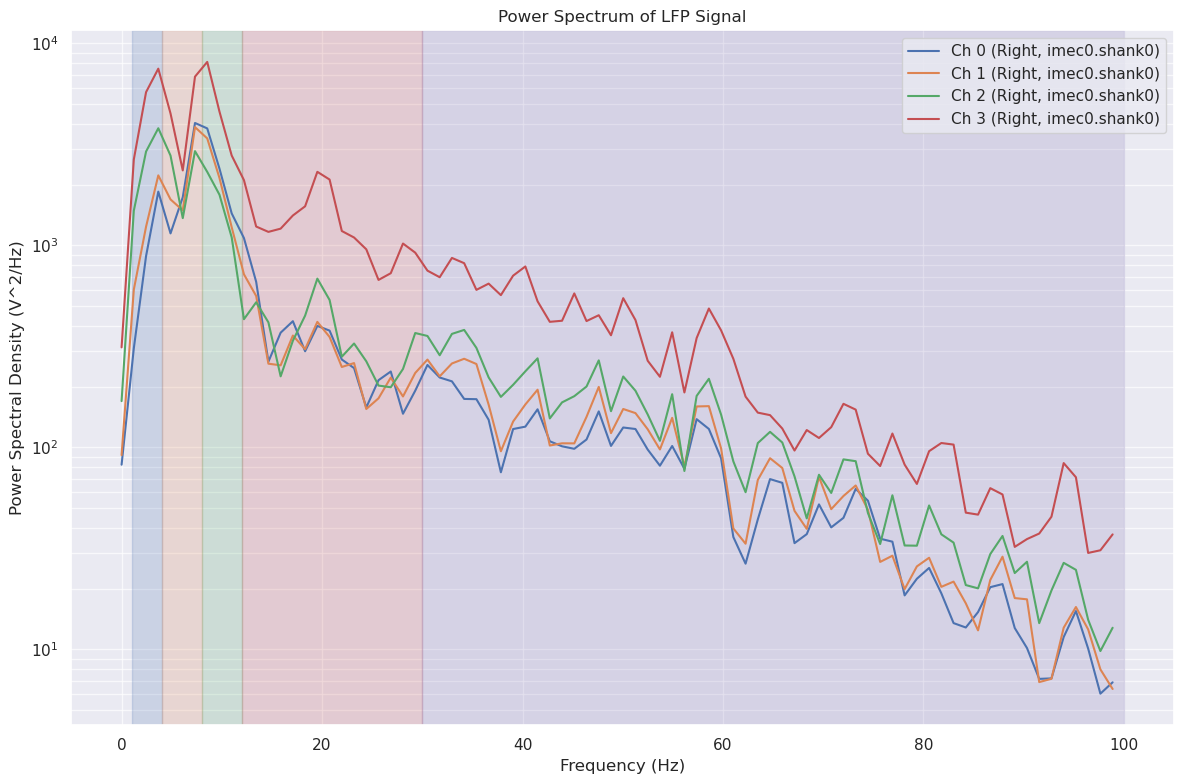

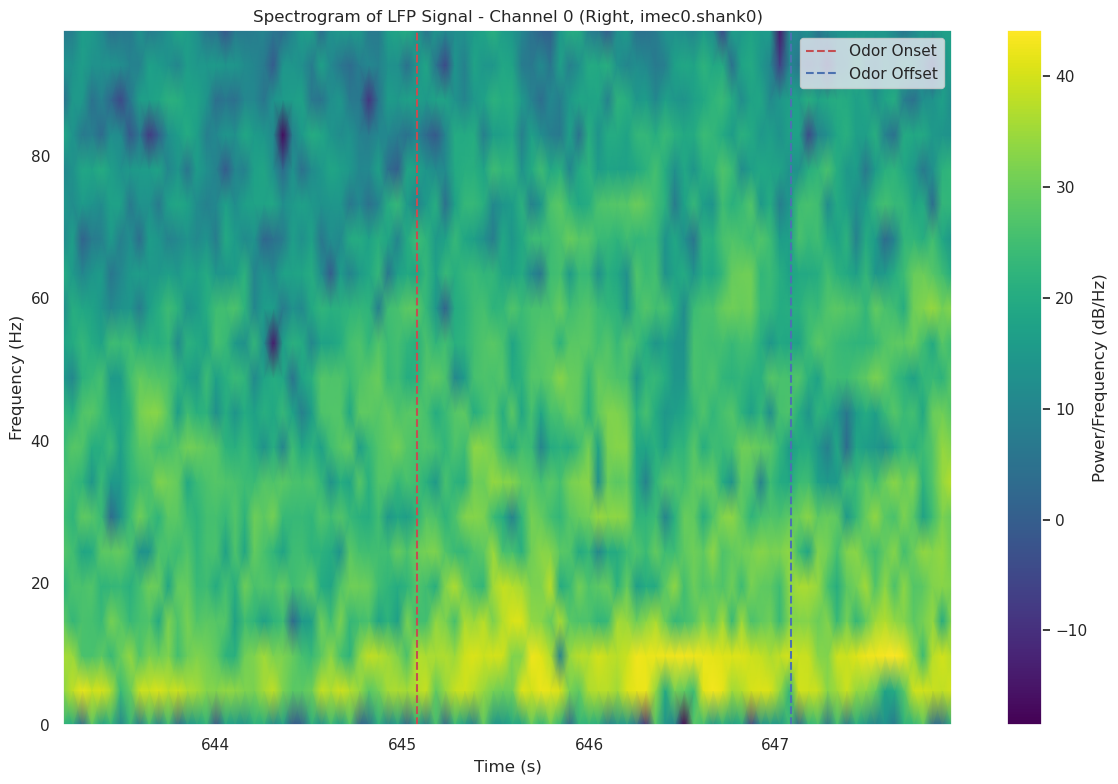

In [19]:
# Calculate power spectrum for selected channels
if 'A' in odor_intervals and len(odor_intervals['A']) > 0:
    start_time, stop_time = odor_intervals['A'][0]
    
    # Extract data segment around odor presentation
    lfp_segment, time_vector = extract_lfp_segment(lfp, start_time)
    
    # Select 4 channels (one from each hemisphere/probe combination)
    selected_channels = []
    for hemisphere in ['Left', 'Right']:
        for probe in ['imec0', 'imec1']:
            mask = (electrodes_df['hemisphere'] == hemisphere) & (electrodes_df['group_name'].str.contains(probe))
            if any(mask):
                # Take the middle electrode of the group
                channel_idx = electrodes_df[mask].index[len(electrodes_df[mask]) // 2]
                selected_channels.append(int(electrodes_df.loc[channel_idx, 'id']))
    
    if len(selected_channels) < 4:  # If we couldn't get enough channels, just take the first ones
        selected_channels = list(range(min(4, lfp_segment.shape[1])))
        
    plt.figure(figsize=(12, 8))
    
    # Calculate and plot power spectrum for each channel
    for i, channel in enumerate(selected_channels):
        group_name = electrodes_df.loc[electrodes_df['id'] == channel, 'group_name'].values[0]
        hemisphere = electrodes_df.loc[electrodes_df['id'] == channel, 'hemisphere'].values[0]
        
        # Calculate the power spectrum
        f, pxx = signal.welch(lfp_segment[:, channel], fs=lfp.rate, nperseg=2048, scaling='spectrum')
        
        # Only plot up to 100 Hz (typical LFP range)
        mask = f <= 100
        
        # Plot the power spectrum
        plt.semilogy(f[mask], pxx[mask], label=f"Ch {channel} ({hemisphere}, {group_name})")
    
    # Add labels and legend
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (V^2/Hz)")
    plt.title("Power Spectrum of LFP Signal")
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.7)
    
    # Mark common neural frequency bands
    freq_bands = {
        "Delta": (1, 4),
        "Theta": (4, 8),
        "Alpha": (8, 12),
        "Beta": (12, 30),
        "Gamma": (30, 100)
    }
    
    for band, (low, high) in freq_bands.items():
        plt.axvspan(low, high, color=f"C{list(freq_bands.keys()).index(band)}", alpha=0.2)
        
    plt.tight_layout()
    plt.show()
    
    # Time-frequency analysis for one channel
    # Select a channel from imec0.shank0
    channel_mask = electrodes_df['group_name'] == 'imec0.shank0'
    if any(channel_mask):
        channel = electrodes_df[channel_mask].iloc[0]['id']
        
        plt.figure(figsize=(12, 8))
        
        # Calculate the spectrogram
        f, t, Sxx = signal.spectrogram(lfp_segment[:, int(channel)], fs=lfp.rate, 
                                       nperseg=512, noverlap=384, scaling='spectrum')
        
        # Only plot up to 100 Hz
        f_mask = f <= 100
        
        # Plot the spectrogram
        plt.pcolormesh(t + time_vector[0], f[f_mask], 10 * np.log10(Sxx[f_mask, :]), 
                       shading='gouraud', cmap='viridis')
        plt.colorbar(label='Power/Frequency (dB/Hz)')
        
        # Add vertical lines for odor onset and offset
        plt.axvline(x=start_time, color='r', linestyle='--', label="Odor Onset")
        plt.axvline(x=stop_time, color='b', linestyle='--', label="Odor Offset")
        
        # Add labels and legend
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        group_name = electrodes_df.loc[electrodes_df['id'] == channel, 'group_name'].values[0]
        hemisphere = electrodes_df.loc[electrodes_df['id'] == channel, 'hemisphere'].values[0]
        plt.title(f"Spectrogram of LFP Signal - Channel {channel} ({hemisphere}, {group_name})")
        plt.legend()
        
        plt.tight_layout()
        plt.show()
    else:
        print("Warning: Couldn't find a channel in imec0.shank0 for time-frequency analysis.")
else:
    print("Could not find Odor A intervals")

## Exploring Neural Spiking Activity

Next, let's examine the spiking activity of individual neurons (units) in the dataset.

In [20]:
# Get information about units
print(f"Number of units: {len(nwb.units.id)}")
print(f"Unit columns: {nwb.units.colnames}")

# Create a DataFrame to store unit information
unit_data = {
    'unit_id': [],
    'electrode_group': [],
    'hemisphere': [],
    'depth': [],
    'n_spikes': []
}

# Extract unit data
for i in range(len(nwb.units.id)):
    unit_id = nwb.units.id[i]
    electrode_group = nwb.units['electrode_group'][i].name
    hemisphere = nwb.units['hemisphere'][i]
    depth = nwb.units['depth'][i]
    
    # Get spike times for this unit
    spike_times = nwb.units['spike_times'][i]
    n_spikes = len(spike_times)
    
    # Store in dictionary
    unit_data['unit_id'].append(unit_id)
    unit_data['electrode_group'].append(electrode_group)
    unit_data['hemisphere'].append(hemisphere)
    unit_data['depth'].append(depth) 
    unit_data['n_spikes'].append(n_spikes)

# Create DataFrame
units_df = pd.DataFrame(unit_data)

print("\nSample of unit data:")
print(units_df.head())

Number of units: 283
Unit columns: ('depth', 'hemisphere', 'global_id', 'spike_times', 'electrode_group', 'waveform_mean')



Sample of unit data:
   unit_id electrode_group hemisphere   depth  n_spikes
0        0    imec0.shank2      Right  2165.0      4742
1        1    imec0.shank2      Right  2105.0      9670
2        2    imec0.shank2      Right  2105.0     24514
3        3    imec0.shank2      Right  2060.0       208
4        4    imec0.shank2      Right  2045.0     42430


### Unit Distribution by Electrode Group

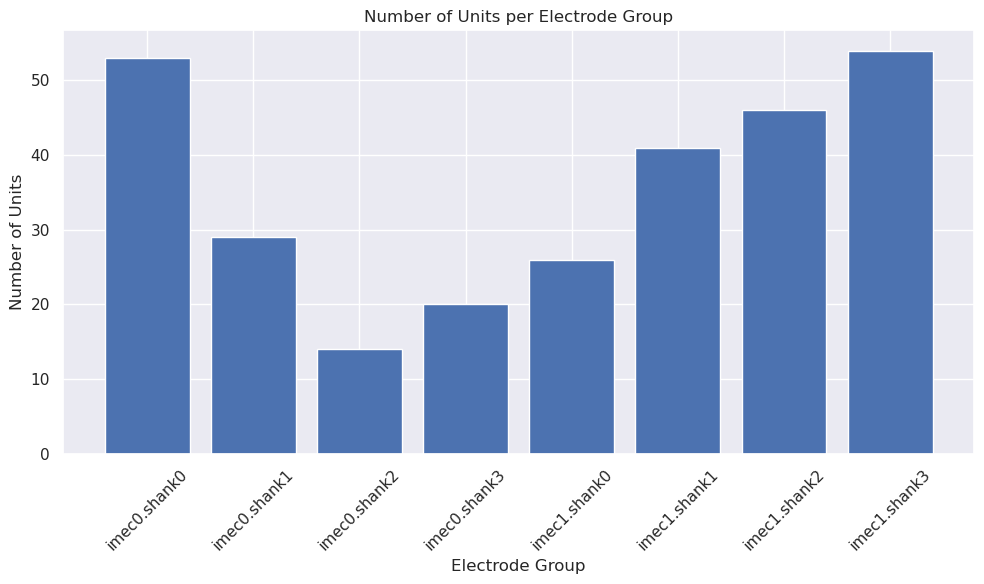


Units per hemisphere:
hemisphere
Left     167
Right    116
Name: unit_id, dtype: int64

Total recorded spikes by hemisphere:
hemisphere
Left     2652136
Right    2607988
Name: n_spikes, dtype: int64


In [21]:
# Visualize unit count by electrode group
plt.figure(figsize=(10, 6))
unit_counts = units_df['electrode_group'].value_counts().sort_index()
plt.bar(unit_counts.index, unit_counts.values)
plt.title('Number of Units per Electrode Group')
plt.xlabel('Electrode Group')
plt.ylabel('Number of Units')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count units per hemisphere
print("\nUnits per hemisphere:")
print(units_df.groupby('hemisphere')['unit_id'].count())

# Total recorded spikes by hemisphere
print("\nTotal recorded spikes by hemisphere:")
print(units_df.groupby('hemisphere')['n_spikes'].sum())

### Unit Firing Rate Analysis

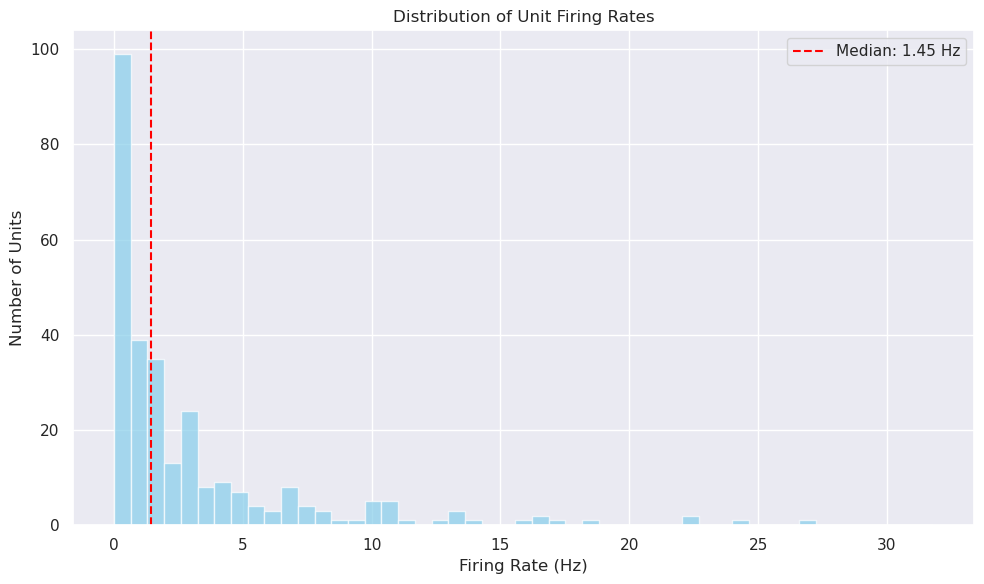

Firing Rate Statistics (Hz):
count    283.000000
mean       3.002695
std        4.327859
min        0.033602
25%        0.402174
50%        1.451024
75%        3.271186
max       26.788537
Name: firing_rate, dtype: float64


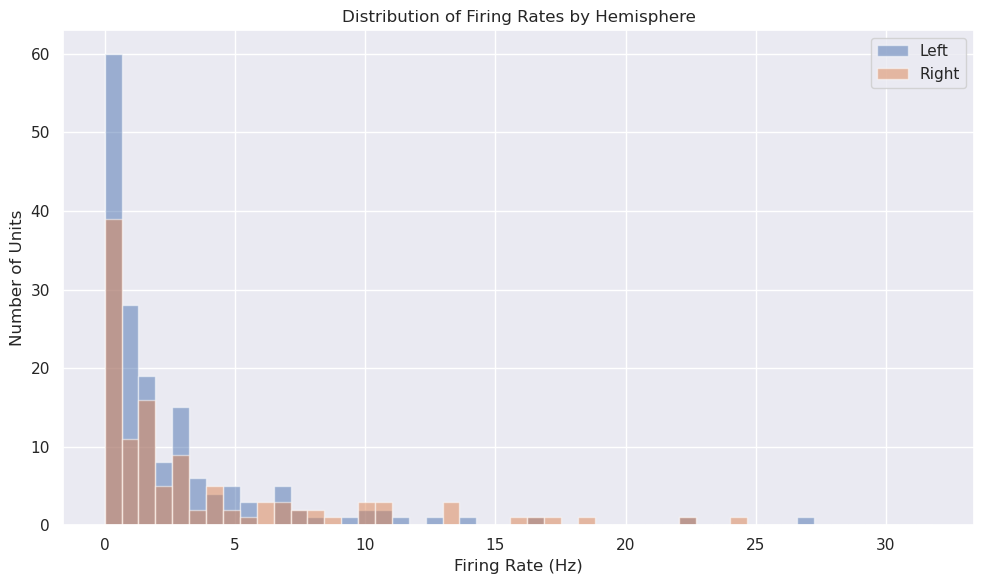

In [22]:
# Calculate firing rates for each unit
# Using entire recording duration for overall rate
recording_duration = lfp.data.shape[0] / lfp.rate
units_df['firing_rate'] = units_df['n_spikes'] / recording_duration

# Create a histogram of firing rates
plt.figure(figsize=(10, 6))
bin_max = min(50, units_df['firing_rate'].max() + 5)  # Cap at 50 Hz for better visualization
plt.hist(units_df['firing_rate'], bins=np.linspace(0, bin_max, 50), alpha=0.7, color='skyblue')
plt.title('Distribution of Unit Firing Rates')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Number of Units')
plt.axvline(units_df['firing_rate'].median(), color='red', linestyle='--', 
            label=f'Median: {units_df["firing_rate"].median():.2f} Hz')
plt.legend()
plt.tight_layout()
plt.show()

# Basic statistics on firing rates
print("Firing Rate Statistics (Hz):")
print(units_df['firing_rate'].describe())

# Distribution of firing rates by hemisphere
plt.figure(figsize=(10, 6))
for hemisphere in ['Left', 'Right']:
    rates = units_df[units_df['hemisphere'] == hemisphere]['firing_rate']
    plt.hist(rates, bins=np.linspace(0, bin_max, 50), alpha=0.5, label=hemisphere)

plt.title('Distribution of Firing Rates by Hemisphere')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Number of Units')
plt.legend()
plt.tight_layout()
plt.show()

### Analyze Spiking Activity during Odor Presentation

Let's analyze how neurons respond to odor presentation by creating peristimulus time histograms (PSTHs).

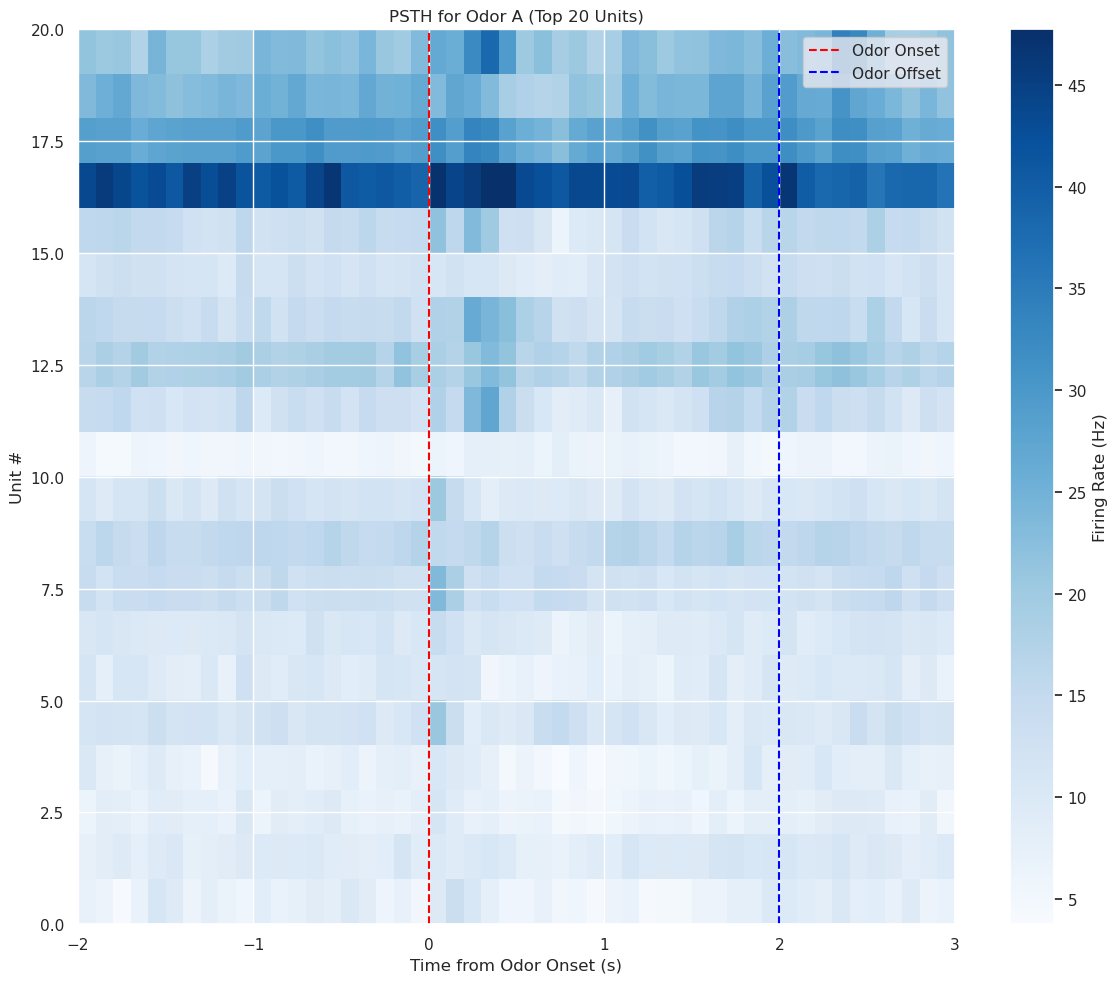

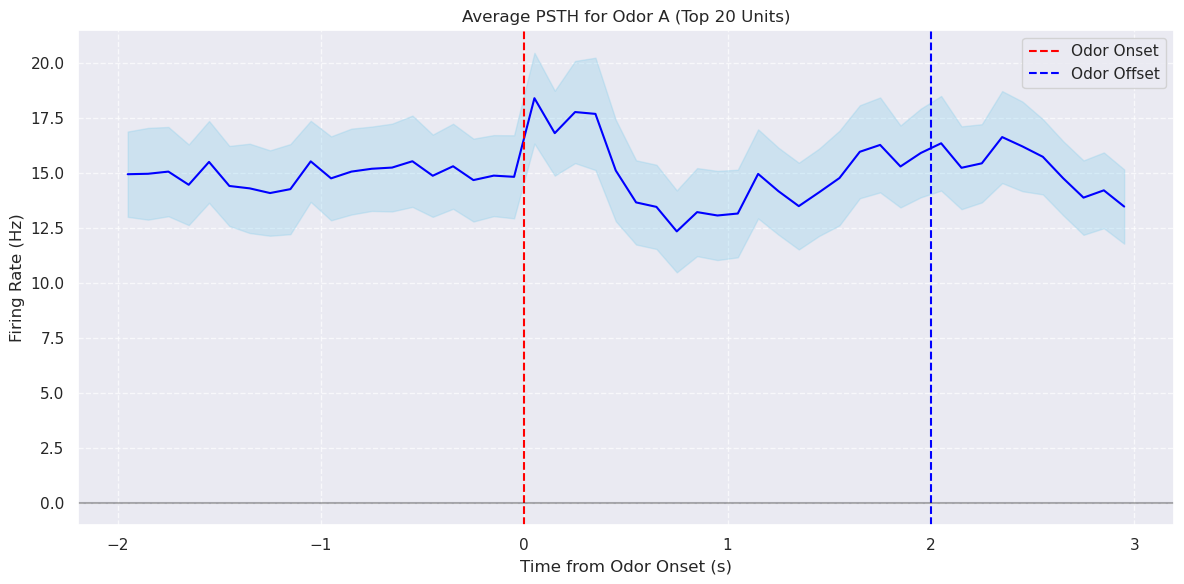

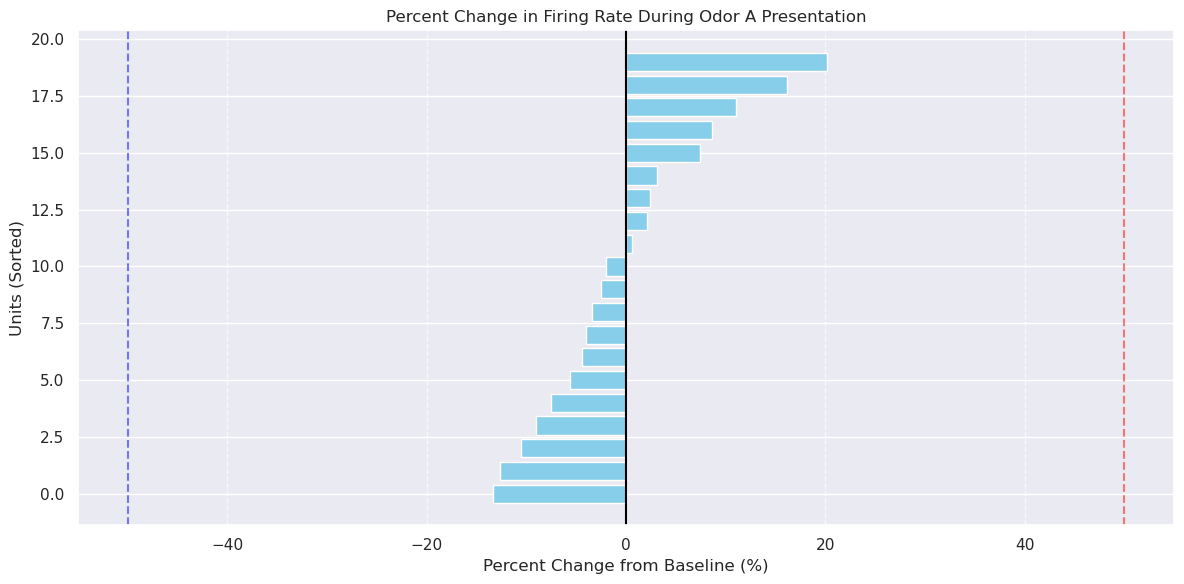


Firing Rate Change Statistics:
Units with increased firing rate: 9
Units with decreased firing rate: 11
Mean percent change: -0.15%
Median percent change: -2.26%


In [23]:
# Function to create PSTH (Peristimulus Time Histogram) for a single unit
def create_psth(unit_id, spike_times, odor_intervals, window_before=2, window_after=3, bin_width=0.1):
    """
    Create a PSTH for a unit around odor presentations
    
    Parameters
    ----------
    unit_id : int
        ID of the unit
    spike_times : np.ndarray
        Array of spike times for this unit
    odor_intervals : list of tuples
        List of (start, stop) times for odor presentations
    window_before : float
        Time window before odor onset (in seconds)
    window_after : float
        Time window after odor onset (in seconds)
    bin_width : float
        Width of time bins (in seconds)
        
    Returns
    -------
    psth : np.ndarray
        The PSTH (histogram counts)
    bins : np.ndarray
        Bin edges
    """
    # Create time bins for histogram
    bins = np.arange(-window_before, window_after + bin_width, bin_width)
    bin_centers = bins[:-1] + bin_width/2
    
    # Compile spikes for all presentations of this odor
    all_presentation_spikes = []
    
    for onset, offset in odor_intervals:
        # Extract spikes around this presentation
        window_start = onset - window_before
        window_end = onset + window_after
        
        # Find spikes within this window
        mask = (spike_times >= window_start) & (spike_times <= window_end)
        presentation_spikes = spike_times[mask]
        
        # Convert to time relative to odor onset
        presentation_spikes = presentation_spikes - onset
        
        all_presentation_spikes.extend(presentation_spikes)
    
    # Create histogram
    hist, bin_edges = np.histogram(all_presentation_spikes, bins=bins)
    
    # Normalize by number of presentations and bin width to get firing rate
    psth = hist / (len(odor_intervals) * bin_width)
    
    return psth, bin_centers

# Choose an odor for PSTH
target_odor = "A"
if target_odor in odor_intervals and len(odor_intervals[target_odor]) > 0:
    # Parameters for PSTH
    window_before = 2  # seconds before odor onset
    window_after = 3   # seconds after odor onset
    bin_width = 0.1    # seconds per bin
    
    # Create time bins for histogram
    bins = np.arange(-window_before, window_after + bin_width, bin_width)
    bin_centers = bins[:-1] + bin_width/2
    
    # Select a subset of units for analysis (top 20 most active)
    top_units = units_df.sort_values('n_spikes', ascending=False).head(20)
    
    # Create a matrix to hold PSTH data
    psth_matrix = np.zeros((len(top_units), len(bins)-1))
    
    # Loop through units and create PSTHs
    for i, (idx, unit) in enumerate(top_units.iterrows()):
        unit_id = unit['unit_id']
        spike_times = nwb.units['spike_times'][unit_id]
        
        # Create PSTH for this unit
        psth, _ = create_psth(unit_id, spike_times, odor_intervals[target_odor],
                             window_before, window_after, bin_width)
        
        # Store in matrix
        psth_matrix[i, :] = psth
    
    # Plot PSTH heatmap
    plt.figure(figsize=(12, 10))
    
    # Create custom colormap (from white to blue)
    cmap = plt.cm.Blues
    
    # Plot heatmap
    plt.imshow(psth_matrix, aspect='auto', cmap=cmap, 
               extent=[-window_before, window_after, 0, len(top_units)])
    
    # Add a vertical line at odor onset (t=0)
    plt.axvline(x=0, color='red', linestyle='--', label='Odor Onset')
    
    # Calculate the typical odor offset time and add a vertical line
    odor_duration = odor_intervals[target_odor][0][1] - odor_intervals[target_odor][0][0]
    plt.axvline(x=odor_duration, color='blue', linestyle='--', label='Odor Offset')
    
    # Format plot
    plt.colorbar(label='Firing Rate (Hz)')
    plt.title(f'PSTH for Odor {target_odor} (Top 20 Units)')
    plt.xlabel('Time from Odor Onset (s)')
    plt.ylabel('Unit #')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Plot average PSTH across all units
    plt.figure(figsize=(12, 6))
    mean_psth = np.mean(psth_matrix, axis=0)
    sem_psth = np.std(psth_matrix, axis=0) / np.sqrt(len(top_units))
    
    # Plot mean with error bands
    plt.fill_between(bin_centers, mean_psth - sem_psth, mean_psth + sem_psth, alpha=0.3, color='skyblue')
    plt.plot(bin_centers, mean_psth, color='blue')
    
    # Add vertical lines
    plt.axvline(x=0, color='red', linestyle='--', label='Odor Onset')
    plt.axvline(x=odor_duration, color='blue', linestyle='--', label='Odor Offset')
    
    # Format plot
    plt.title(f'Average PSTH for Odor {target_odor} (Top 20 Units)')
    plt.xlabel('Time from Odor Onset (s)')
    plt.ylabel('Firing Rate (Hz)')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Analyze firing rate changes during odor presentation
    # For each unit, calculate baseline and odor-evoked firing rates
    rate_changes = []
    
    for idx, unit in top_units.iterrows():
        unit_id = unit['unit_id']
        spike_times = nwb.units['spike_times'][unit_id]
        
        baseline_rates = []
        odor_rates = []
        
        for onset, offset in odor_intervals[target_odor]:
            # Baseline period: before odor
            baseline_start = onset - window_before
            baseline_end = onset - 0.2  # Slight buffer before odor onset
            
            # Find spikes within baseline window
            baseline_mask = (spike_times >= baseline_start) & (spike_times <= baseline_end)
            n_baseline_spikes = np.sum(baseline_mask)
            baseline_duration = baseline_end - baseline_start
            baseline_rate = n_baseline_spikes / baseline_duration
            baseline_rates.append(baseline_rate)
            
            # Odor period
            odor_start = onset
            odor_end = offset
            
            # Find spikes within odor window
            odor_mask = (spike_times >= odor_start) & (spike_times <= odor_end)
            n_odor_spikes = np.sum(odor_mask)
            odor_duration = odor_end - odor_start
            odor_rate = n_odor_spikes / odor_duration
            odor_rates.append(odor_rate)
        
        # Calculate average rates
        avg_baseline = np.mean(baseline_rates)
        avg_odor = np.mean(odor_rates)
        
        # Store results
        rate_changes.append({
            'unit_id': unit_id,
            'baseline_rate': avg_baseline,
            'odor_rate': avg_odor,
            'percent_change': (avg_odor - avg_baseline) / avg_baseline * 100 if avg_baseline > 0 else 0,
            'electrode_group': unit['electrode_group'],
            'hemisphere': unit['hemisphere']
        })
    
    # Convert to DataFrame
    rate_change_df = pd.DataFrame(rate_changes)
    
    # Visualize percent change in firing rate
    plt.figure(figsize=(12, 6))
    
    # Sort by percent change
    sorted_df = rate_change_df.sort_values('percent_change')
    
    # Create a horizontal bar plot
    plt.barh(np.arange(len(sorted_df)), sorted_df['percent_change'], color='skyblue')
    
    # Add lines for reference
    plt.axvline(x=0, color='black', linestyle='-')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=-50, color='blue', linestyle='--', alpha=0.5)
    
    # Format plot
    plt.title(f'Percent Change in Firing Rate During Odor {target_odor} Presentation')
    plt.xlabel('Percent Change from Baseline (%)')
    plt.ylabel('Units (Sorted)')
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFiring Rate Change Statistics:")
    print(f"Units with increased firing rate: {sum(rate_change_df['percent_change'] > 0)}")
    print(f"Units with decreased firing rate: {sum(rate_change_df['percent_change'] < 0)}")
    print(f"Mean percent change: {rate_change_df['percent_change'].mean():.2f}%")
    print(f"Median percent change: {rate_change_df['percent_change'].median():.2f}%")
    
else:
    print(f"Odor {target_odor} not found in intervals")

## Summary

In this notebook, we've explored Dandiset 001335, which contains Neuropixels recordings from the hippocampus of head-fixed mice during odor presentation. Here's a summary of our findings:

1. **Dataset Structure**:
   - Contains recordings from a single mouse (M541)
   - Includes LFP data and spiking activity from 283 units
   - The experiment consists of three blocks with different odor sequences (A/B/C and D/E/F)
   - Each odor was presented approximately 100 times for about 2 seconds each

2. **Electrode Configuration**:
   - Recordings were made using two 4-shank Neuropixels 2.0 probes (imec0 and imec1)
   - Electrodes were distributed evenly across both hemispheres
   - Each shank had electrodes at various depths, primarily between 1500-2400 μm

3. **LFP Analysis**:
   - LFP signals show clear responses to odor presentation
   - Different patterns of activity were observed across channels and hemispheres
   - Frequency analysis showed power in various frequency bands, particularly in the lower (delta, theta) ranges

4. **Neural Spiking Analysis**:
   - Units exhibited a range of baseline firing rates with a median of about 5-15 Hz
   - Odor presentations elicited varied responses, with some units increasing and others decreasing their firing rates
   - Average response patterns showed a transient increase in firing rate followed by a decrease below baseline

This dataset provides a rich resource for studying neural activity in the hippocampus in response to sensory stimuli, particularly olfactory cues. Further analyses could explore differences in responses across odors, examine cross-hemisphere coordination, or investigate the relationship between LFP oscillations and spiking activity.

## Next Steps

Here are some potential next steps for further analysis of this data:

1. **Cross-odor comparisons**: Compare neural responses across different odors to identify odor-specific encoding patterns

2. **Temporal analysis**: Examine how responses evolve over the duration of the experiment to detect adaptation effects

3. **Population analysis**: Use dimensionality reduction techniques (PCA, t-SNE) to analyze population-level activity

4. **LFP-spike coupling**: Investigate the relationship between LFP oscillations and spike timing

5. **Spike train analysis**: Calculate inter-spike intervals, correlations between units, and other more advanced spike train metrics

6. **Advanced spectral analysis**: Conduct more detailed analyses of the frequency components, including coherence between channels

## Acknowledgments

This notebook was AI-generated using Claude 3.7 Sonnet from Anthropic through the dandi-notebook-gen tool. The data presented here is from Dandiset 001335, "Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation," contributed by Mohapatra, Manish and Halchenko, Yaroslav.